<a href="https://colab.research.google.com/github/vloneonme/trew/blob/main/4m_lr6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 x    точное     Эйлер   МодЭйлер    Р-К
1.0  1.000000  1.000000  1.000000  1.000000
1.2  1.057128  1.066667  1.058025  1.057130
1.4  1.099921  1.116049  1.101343  1.099924
1.6  1.133148  1.154010  1.134901  1.133153
1.8  1.159685  1.184063  1.161659  1.159689
2.0  1.181360  1.208426  1.183489  1.181365
2.2  1.199396  1.228566  1.201638  1.199401
2.4  1.214636  1.245489  1.216964  1.214641
2.6  1.227682  1.259904  1.230077  1.227687
2.8  1.238977  1.272329  1.241424  1.238982
3.0  1.248849  1.283148  1.251339  1.248854


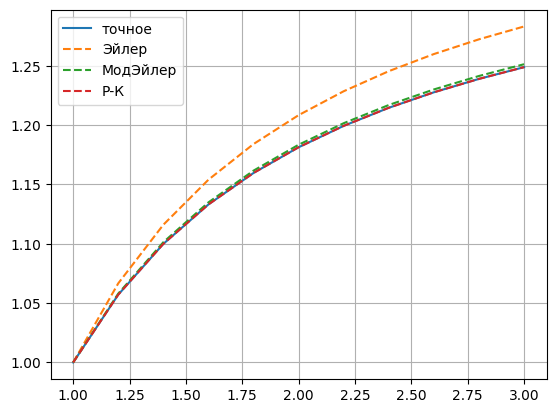

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# исходные данные
def f(x, y):
    return y / (3 * x**2)

def exact(x):
    return np.exp((1/3) * (1 - 1/x))

x0, y0 = 1.0, 1.0
a, b = 1.0, 3.0
h = 0.4
h2 = h / 2

# методы
def euler(h):
    x = np.arange(a, b + h, h)
    y = np.zeros_like(x)
    y[0] = y0
    for i in range(len(x) - 1):
        y[i+1] = y[i] + h * f(x[i], y[i])
    return x, y

def euler_mod(h):
    x = np.arange(a, b + h, h)
    y = np.zeros_like(x)
    y[0] = y0
    for i in range(len(x) - 1):
        y_pred = y[i] + h * f(x[i], y[i])
        y[i+1] = y[i] + h/2 * (f(x[i], y[i]) + f(x[i+1], y_pred))
    return x, y

def rk4(h):
    x = np.arange(a, b + h, h)
    y = np.zeros_like(x)
    y[0] = y0
    for i in range(len(x) - 1):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + h/2, y[i] + h*k1/2)
        k3 = f(x[i] + h/2, y[i] + h*k2/2)
        k4 = f(x[i] + h, y[i] + h*k3)
        y[i+1] = y[i] + h/6 * (k1 + 2*k2 + 2*k3 + k4)
    return x, y

# расчёты
x_e, y_e = euler(h2)
_, y_e_h = euler(h)

x_em, y_em = euler_mod(h2)
_, y_em_h = euler_mod(h)

x_rk, y_rk = rk4(h2)
_, y_rk_h = rk4(h)

y_exact = exact(x_e)

# таблица
print(" x    точное     Эйлер   МодЭйлер    Р-К")
for i in range(len(x_e)):
    print(f"{x_e[i]:.1f}  {y_exact[i]:.6f}  {y_e[i]:.6f}  {y_em[i]:.6f}  {y_rk[i]:.6f}")

# погрешности
err_e = np.abs(y_exact - y_e)
err_em = np.abs(y_exact - y_em)
err_rk = np.abs(y_exact - y_rk)

# оценка по Рунге
runge_e = np.abs(y_e[::2] - y_e_h) / (2**1 - 1)
runge_em = np.abs(y_em[::2] - y_em_h) / (2**2 - 1)
runge_rk = np.abs(y_rk[::2] - y_rk_h) / (2**4 - 1)

# график
plt.figure()
plt.plot(x_e, y_exact, label="точное")
plt.plot(x_e, y_e, "--", label="Эйлер")
plt.plot(x_em, y_em, "--", label="МодЭйлер")
plt.plot(x_rk, y_rk, "--", label="Р-К")
plt.legend()
plt.grid()
plt.savefig("lab6_variant2.png")
plt.show()

In [ ]:
err_e = np.abs(y_exact - y_e)
err_em = np.abs(y_exact - y_em)
err_rk = np.abs(y_exact - y_rk)

print("\nПогрешность относительно точного решения")
print(" x    Euler       ModEuler     RK4")
for i in range(len(x_e)):
    print(f"{x_e[i]:.1f}  {err_e[i]:.6e}  {err_em[i]:.6e}  {err_rk[i]:.6e}")




Погрешность относительно точного решения
 x    Euler       ModEuler     RK4
1.0  0.000000e+00  0.000000e+00  0.000000e+00
1.2  9.538922e-03  8.969466e-04  2.572958e-06
1.4  1.612867e-02  1.421949e-03  3.669290e-06
1.6  2.086179e-02  1.752691e-03  4.215728e-06
1.8  2.437791e-02  1.973812e-03  4.525578e-06
2.0  2.706561e-02  2.128982e-03  4.720778e-06
2.2  2.917036e-02  2.242304e-03  4.854557e-06
2.4  3.085286e-02  2.327861e-03  4.952490e-06
2.6  3.222179e-02  2.394289e-03  5.027923e-06
2.8  3.335273e-02  2.447104e-03  5.088331e-06
3.0  3.429959e-02  2.489957e-03  5.138172e-06


In [ ]:
runge_e  = np.abs(y_e[::2] - y_e_h)  / (2**1 - 1)
runge_em = np.abs(y_em[::2] - y_em_h) / (2**2 - 1)
runge_rk = np.abs(y_rk[::2] - y_rk_h) / (2**4 - 1)

print("\nОценка погрешности по правилу Рунге")
print(" x    Euler       ModEuler     RK4")
for i in range(len(x_e[::2])):
    print(f"{x_e[i*2]:.1f}  {runge_e[i]:.6e}  {runge_em[i]:.6e}  {runge_rk[i]:.6e}")


Оценка погрешности по правилу Рунге
 x    Euler       ModEuler     RK4
1.0  0.000000e+00  0.000000e+00  0.000000e+00
1.4  1.728395e-02  1.290920e-03  3.168164e-06
1.8  2.636824e-02  1.812449e-03  3.944953e-06
2.2  3.167635e-02  2.069671e-03  4.245045e-06
2.6  3.505600e-02  2.215851e-03  4.401904e-06
3.0  3.735340e-02  2.307856e-03  4.500729e-06
